# Machine Learning Project - Estimating 2nd hand Laptop Price


## Business Objective

A C2B firm is in the process of creating an Online platform where the consumers can sell their used Laptops. This platform should host an automated mechanism that can suggest to a consumer the realistic price of their used laptop when the required details (different features of the laptop) are provided.


## Problem Statement   

You have been assigned the task to build for this C2B firm a Linear Regression Machine Learning model which will give as a prediction the used laptop’s price. For more details on the intermediate and final outputs expected, refer to the list of deliverables mentioned in the “Model Building” and “Model Validation” sections below.


### Importing the all the Required Libraries

In [195]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [196]:
import pandas as pd
import os
os.chdir(r'F:\ML project\Data Sets-20220427')
os.listdir()

['Dataset (3).csv']

In [197]:
data=pd.read_csv('Dataset (3).csv')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [198]:
data.shape

(1303, 13)

In [199]:
# The dataset has 1303 records and 13 Features where in 12 are Independent Features and 1 is Dependent Feature

## Checking Missing values and Data type of variables


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [201]:
print(type(data.Weight[0]))
print(type(data.Ram[0]))

<class 'str'>
<class 'str'>


In [202]:
# There're no NULL values 
# Weight and Ram is read in Object due to KG and GB

In [203]:
data.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99]).round(2)

,laptop_ID,Inches,Price_euros
count,1303.00,1303.00,1303.00
mean,660.16,15.02,1123.69
std,381.17,1.43,699.01
min,1.00,10.10,174.00
1%,14.02,11.60,229.00
5%,67.10,12.50,309.00
25%,331.50,14.00,599.00
50%,659.00,15.60,977.00
75%,990.50,15.60,1487.88
95%,1254.90,17.30,2448.60


## There're no Outliers found

## Keyinsights
*---Minimum inch size for the laptop is 10.10 and maximum inch size is 18.40

*---50% or less than 50% of the laptops have inch size 15.60.

*---75% or less than 75% of the laptops have price 1487.88 euros.

*---The maximum weight of the laptop is 4.70 kg while minimum weight is 0.69 kg

In [204]:
data.describe(include='object')

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Lenovo,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


In [205]:
# weight and Ram column needs to be converted into numeric by removing the unit written after value.
# So we will perform data cleaning here to get the correct types of columns.
# Removing gb and kg from Ram and weight and convert the cols to numeric

In [206]:
data['Ram'] = data['Ram'].str.replace("GB", "")
data['Ram'] = data['Ram'].astype('int32')

In [207]:
data['Weight'] = data['Weight'].str.replace("kg", "")
data['Weight'] = data['Weight'].astype('float32')

In [208]:
data.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float32
 12  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(8)
memory usage: 122.3+ KB


# Checking duplicated rows

In [210]:
data.duplicated().sum()

0

In [211]:
# There're no duplicate Values

## Removing Laptop Id and Product features as it is not so much in the analysis and modelling

In [212]:
data.drop('laptop_ID',axis=1,inplace=True)
data.drop('Product',axis=1,inplace=True)

In [213]:
data.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69


# 1) Distribution of target column

In [214]:
import warnings
warnings.filterwarnings('ignore')

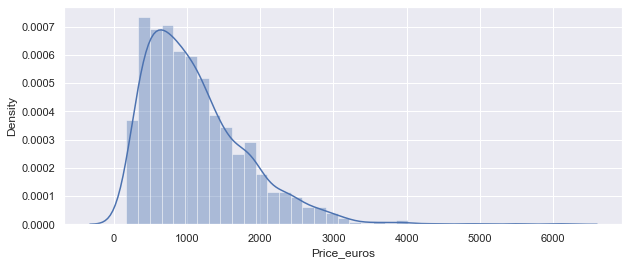

In [215]:
plt.figure(figsize=(10,4))
sns.distplot(data['Price_euros'])
plt.show();

In [216]:
# Observation
## The distribution of the target variable is skewed and it is obvious that commodities with low prices are sold and
## purchased more than the branded ones.

# 2) Company column


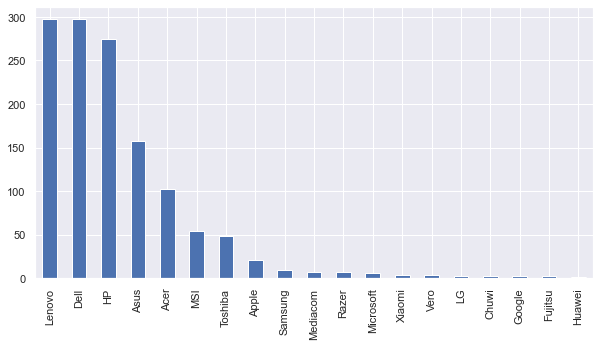

In [217]:
plt.figure(figsize=(10,5))
data.Company.value_counts().plot(kind='bar');

In [218]:
# Lenovo, Dell and Hp products more in the data

## what is avg price of each brand?

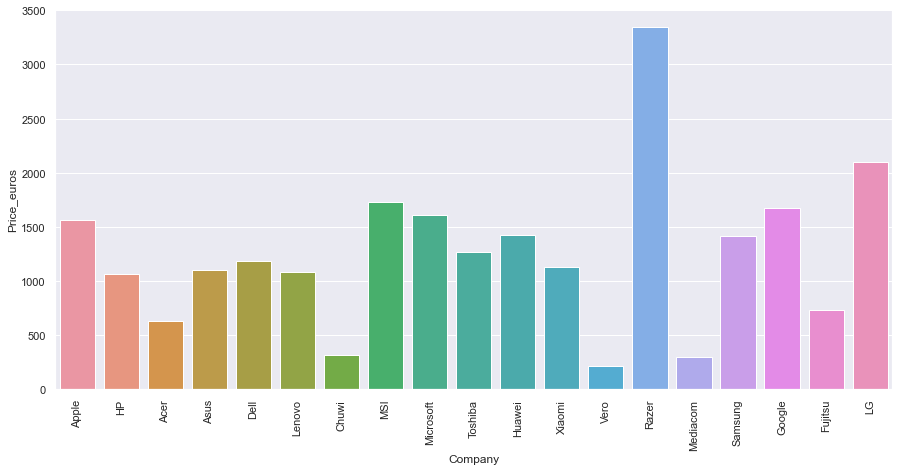

In [219]:
plt.figure(figsize=(15,7))
sns.barplot(x=data['Company'], y=data['Price_euros'],ci=None)

plt.xticks(rotation="vertical")

plt.show()

In [220]:
# Observation
# Razer, Apple, LG, Microsoft, Google, MSI laptops are expensive, and others are in the budget range.

# 3) Type of laptop


In [221]:
# Which type of laptop people are looking for like a gaming laptop, workstation, or notebook.
# As major people prefer notebook because it is under budget range and the same can be concluded from our data.

In [222]:
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [223]:
Type_name= pd.DataFrame(data['TypeName'].value_counts())
labelsedu = data['TypeName'].unique()

In [224]:
fig = make_subplots(rows=1,cols=2,specs=[[{'type':'domain'}, {'type':'domain'}]])

In [225]:
tr3 =go.Pie(labels=labelsedu,values=Type_name.iloc[:,0])
fig.add_trace(tr3,row=1,col=1)
fig.update_layout(height=500, width=800, title_text='Distribution of Type of Laptops')
fig.show()

In [226]:
p=data['TypeName'].value_counts(normalize=True)
p

Notebook              0.557943
Gaming                0.157329
Ultrabook             0.150422
2 in 1 Convertible    0.092863
Workstation           0.022256
Netbook               0.019186
Name: TypeName, dtype: float64

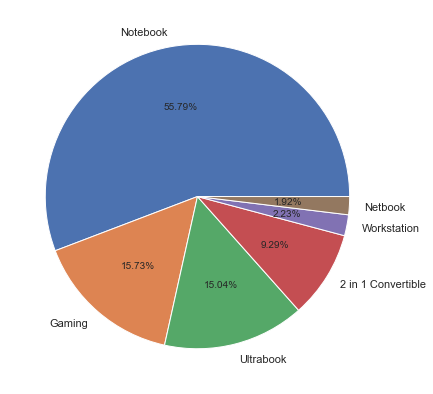

In [227]:
plt.figure(figsize=(10,7))
plt.pie(p,labels=['Notebook','Gaming','Ultrabook','2 in 1 Convertible','Workstation','Netbook'],autopct='%1.2f%%');

In [228]:
# Observation
# As major people prefer notebook because it is under budget range and the same can be concluded from our data.

# Plotting TypeName against Price

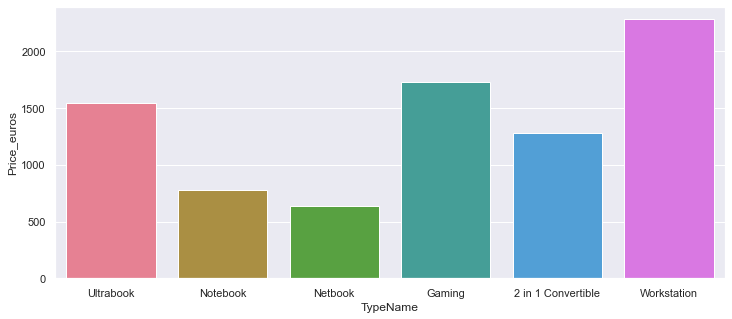

In [229]:
plt.figure(figsize=(12,5))
sns.barplot(x='TypeName',y='Price_euros',data=data,ci=None,palette="husl");

In [230]:
# Observation
# Workstation has the higher Price compared to other types

# 4) Does the price vary with laptop size in inches?

In [231]:
sns.set_theme()

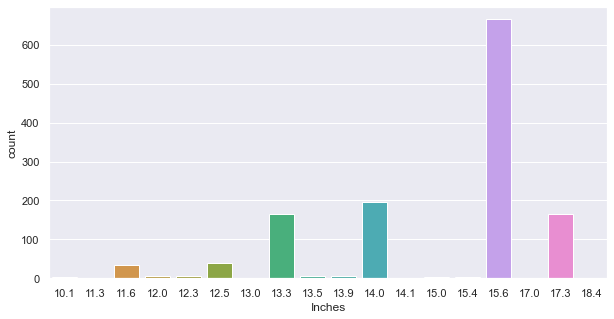

In [232]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='Inches');

In [233]:
# Observation
# 15.6 inches was bought the highest followed by 14,13 and17

# Plotting against Price

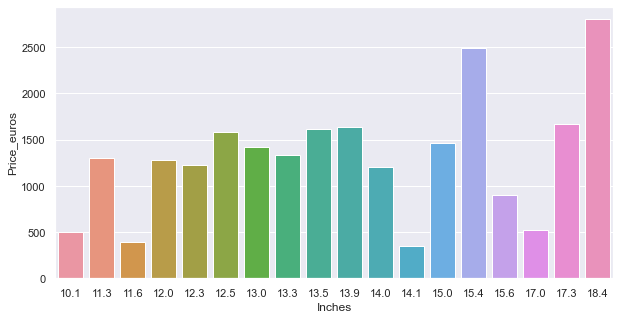

In [234]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Inches',y='Price_euros',ci=None);

In [235]:
# 18.4 inches screen has the highest price
# 15.4 standsout second this might due to the specifications that are specifically given to that particular model might be good

# Feature Engineering

# 5) ScreenResolution Column

In [236]:
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00


In [237]:
data.ScreenResolution.nunique()

40

In [238]:
data.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

# Extracting laptops with Touchscreen feature

In [239]:
# Here the unique values are more, Inorder to make use of this data Feature Engineering has to be performed Where we divide 
# this feature into 2 or 3 new features by taking some criteria 
# The criteria can be 
# The each record consists of whether the laptop is touch screen or not 
# [ we can make use of this, If it is a touchScreen we'll indicate with 1 else 0]

In [240]:
# Making use of lambda function 'x' is iterator which runs through the feature and if it finds 'Touchscreen' it assigns 1 else 0

In [241]:
data['Touchscreen'] = data.ScreenResolution.apply(lambda x:1 if 'Touchscreen' in x else 0)

In [242]:
data.Touchscreen.value_counts(normalize=True)

0    0.852648
1    0.147352
Name: Touchscreen, dtype: float64

In [243]:
# About 85% of the laptops are not with Touchscreen 

# Visualizing

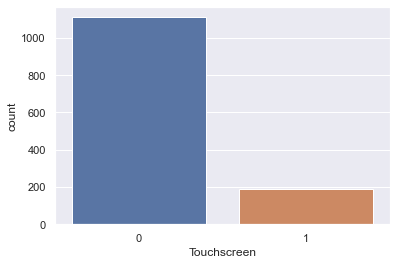

In [244]:
sns.countplot(data['Touchscreen']);

# Plaotting against Price

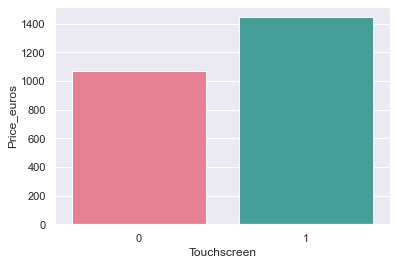

In [245]:
sns.barplot(x=data['Touchscreen'],y=data['Price_euros'],ci=None,palette="husl");

In [246]:
# Observations
# laptops with touchscreens are expensive which is true in real life.

# Extracting IPS Channel presence information

In [247]:
# We can also find that most of Records contain IPS(in-plane switching, a type of LED (a form of LCD) display panel technology)
# We can check the laptops having IPS and can make it into a new Feature
# If the laptop has IPS it is 1 else 0

In [248]:
data['IPS']=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [249]:
data.IPS.value_counts()

0    938
1    365
Name: IPS, dtype: int64

In [250]:
data.IPS.value_counts(normalize=True)

0    0.719877
1    0.280123
Name: IPS, dtype: float64

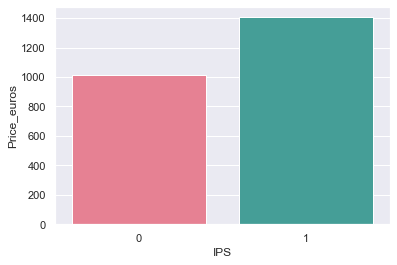

In [251]:
sns.barplot(x=data['IPS'],y=data['Price_euros'],ci=None,palette="husl");

# Visualizing

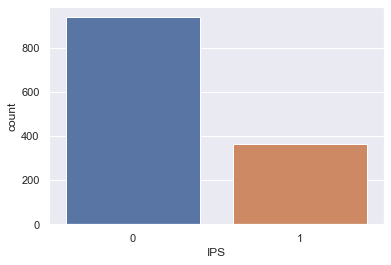

In [252]:
sns.countplot(data['IPS']);

In [253]:
# Observation
# The laptops with IPS channel are present less in our data 

# Plotting against Price

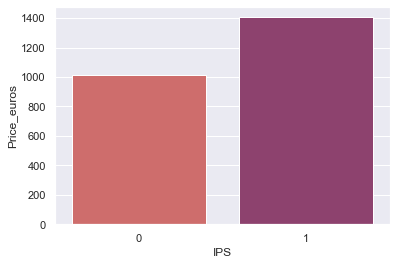

In [254]:
sns.barplot(x=data['IPS'],y=data['Price_euros'],ci=None,palette="flare");

In [255]:
# Observation
# The relationship against the price of IPS channel laptops are high.

# Extracting X-axis and Y-axis screen resolution dimensions

In [256]:
# There's a Dimesions of X and Y are mentioned in each of the records this can be taken as a criteria

In [257]:
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0


In [258]:
# The co-ordinates of X and Y are placed at the end of the String inorder to specifically access this we need to get to the last
# position of the string and then split that with respective ('x') so that the [0] index will be X and the [1] index will be Y

In [259]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [260]:
s='IPS Panel Retina Display 2560x1600'
sp=s.split()[-1]
sp.split("x")[1]

'1600'

In [261]:
s='IPS Panel Retina Display 2560x1600'
sp=s.split()[-1]
sp.split("x")[0]

'2560'

In [262]:
# Running it in a function to make the task easy

In [263]:
def Xresolution(s):
  return s.split()[-1].split("x")[0]

In [264]:
data['X_resol']=data['ScreenResolution'].apply(lambda x: Xresolution(x))

In [265]:
# Similarly for Y 

In [266]:
def Yresolution(s):
    return s.split()[-1].split("x")[1]

In [267]:
data['Y_resol']=data['ScreenResolution'].apply(lambda y: Yresolution(y))

In [268]:
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_resol,Y_resol
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080


In [269]:
# Here X_resol and Y_resol are in String format 
# Converting them into Integer format

In [270]:
data['X_resol']=data.X_resol.astype('int')

In [271]:
data['Y_resol']=data.Y_resol.astype('int')

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_resol           1303 non-null   int32  
 14  Y_resol           1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


# 6) For CPU column

In [273]:
data.Cpu.nunique()

118

In [274]:
# It has 118 Unique values

In [275]:
data.Cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [276]:
# This is the information about the Processor used in the laptop and its speed
# So this is the main takeaway from Cpu column

In [277]:
# The starting 3 words indicates the Processor used, If we can separate this and categorize into some number of classes so that
# the classification of laptops can be 

In [278]:
s=''.join(data.Cpu[5].split()[0:3])
s

'AMDA9-Series9420'

In [279]:
s.split()[0]

'AMDA9-Series9420'

In [280]:
# We are runing it in a function to make the task easy

In [281]:
# If the processor is ['Intel Core i7', 'Intel Core i5', 'Intel Core i3'] we are returing as the same these are 3 Classes
# Incase if it is not in these 3 it will return as 'Other Intel Processor' basing upon the condition if the first word is 'Intel'
# This is one Class
# Incase if the condition fails for the above two it will return 'AMD Processor'
# Therefore the Total number of Classes for CPU is 5

In [282]:
def get_processor(x):
  processor_name = " ".join(x.split()[0:3])

  if processor_name == 'Intel Core i3' or processor_name == 'Intel Core i5' or processor_name == 'Intel Core i7':
    return processor_name
  elif processor_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'

In [283]:
# Here x is the iterative which runs through Cpu column

In [284]:
data['Cpu_Processor'] = data.Cpu.apply(lambda x: get_processor(x))

In [285]:
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_resol,Y_resol,Cpu_Processor
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5


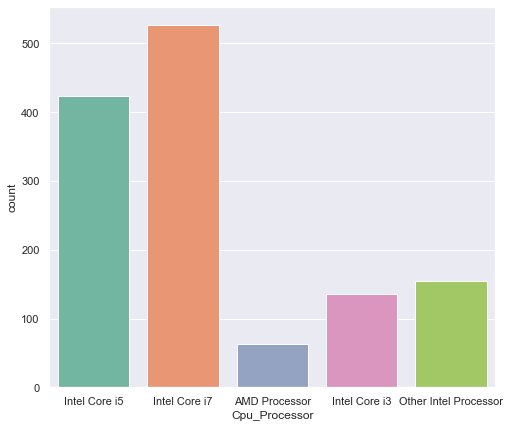

In [286]:
plt.figure(figsize=(8,7))
sns.countplot(data=data,x='Cpu_Processor',palette='Set2');

In [287]:
# Observation
# Intel Core i7 has the higher count followed by Intel Core i5
# Most of the processors used is of Intel in which Core i-7 and i-5 has significantly higer user rate

# Plotting Cpu_Processor against Price

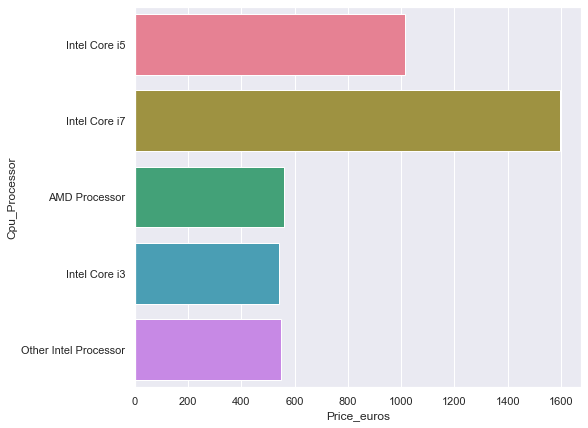

In [288]:
plt.figure(figsize=(8,7))
sns.barplot(data=data,x='Price_euros',y='Cpu_Processor',palette='husl',ci=None,orient='h');

In [289]:
# Observation
# Intel Core i7 has the highest cost followed by Intel Core i5 and AMD Processor, Intel Core i3 and other Intel processors
# are on same range and we can say that the price of the Processor depends upon the type of Processor itself

In [290]:
# Intel Core i7 has the highest cost followed by Intel Core i5 
# AMD, Intel Core i3 and other Intel processors are on same price range

# 7) Price variation with respective RAM

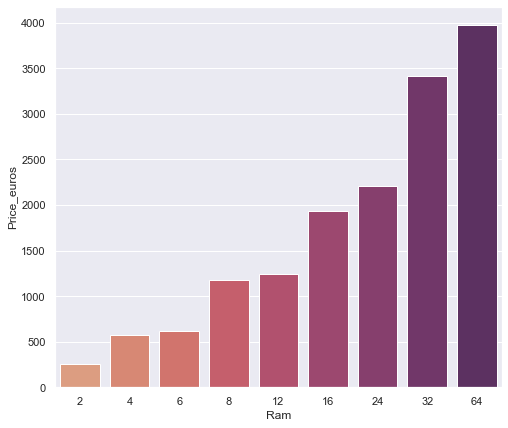

In [291]:
plt.figure(figsize=(8,7))
sns.barplot(data=data,x='Ram',y='Price_euros',palette='flare',ci=None);

In [292]:
# Observation
# Clearly Ram has linear relationship with Price 
# As the Ram size is increasing the Price is also increasing
# This could mean that there's a strong corelation between these two variables

# 8) GPU Column

In [293]:
data.Gpu.nunique()

110

In [294]:
data.Gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [295]:
data.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M3000M         1
Nvidia GeForce GTX1060       1
AMD Radeon Pro 555           1
Nvidia GeForce 920           1
AMD Radeon R5 M315           1
Name: Gpu, Length: 110, dtype: int64

In [296]:
# This feature has the data containing the brand or company name on it, It doesn't have the specifications like ram capacities
# So we can simply takeout the Brand name from this feature

In [297]:
data.Gpu[0].split()[0]

'Intel'

In [298]:
Gpu_brand = data.Gpu.apply(lambda x:x.split()[0])

In [299]:
Gpu_brand

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu, Length: 1303, dtype: object

In [300]:
per=Gpu_brand.value_counts()
per

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu, dtype: int64

In [301]:
perc=Gpu_brand.value_counts(normalize=True)
perc

Intel     0.554106
Nvidia    0.306984
AMD       0.138143
ARM       0.000767
Name: Gpu, dtype: float64

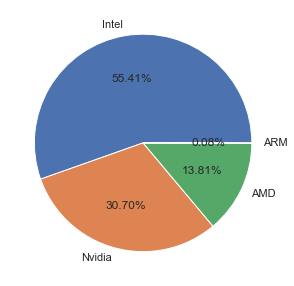

In [302]:
plt.figure(figsize=(7,5))
plt.pie(perc,labels=['Intel','Nvidia','AMD','ARM'],autopct='%1.2f%%');

In [303]:
# ARM occupies only 1% so we can drop it

In [304]:
data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])
data = data[data['Gpu_brand'] != 'ARM']

In [305]:
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_resol,Y_resol,Cpu_Processor,Gpu_brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,Intel


# 9) Operating System Column


In [306]:
data.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

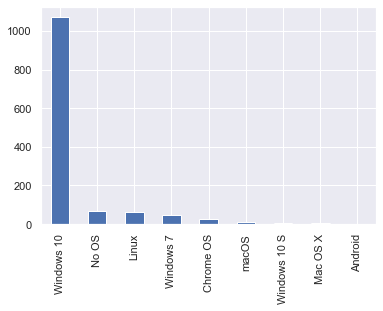

In [307]:
data.OpSys.value_counts().plot(kind='bar');

In [308]:
# We have 3 types in Windows
# Two types in Mac
# Rest of them contains Linux, No OS, Chrome OS, Android

In [309]:
# Clubbing all the Window variants into one variable and all the Mac into onE Variable and Other OS variable
# This will make the Analysis easier

In [310]:
def Sys_OS(i):
    if i == 'Windows 10' or i == 'Windows 7' or i == 'Windows 10 S':
        return 'Windows'
    elif i == 'macOS' or i == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [311]:
data['Op_sys'] = data['OpSys'].apply(Sys_OS)

In [312]:
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_resol,Y_resol,Cpu_Processor,Gpu_brand,Op_sys
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,Intel,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,Intel,Others/No OS/Linux


# Visualization

In [313]:
data.Op_sys.value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: Op_sys, dtype: int64

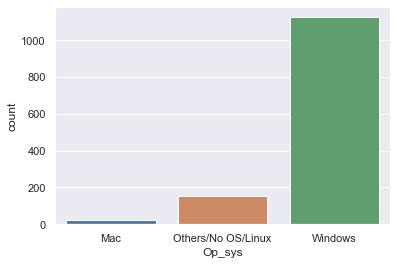

In [314]:
sns.countplot(data=data,x='Op_sys');

In [315]:
# Observation 
# Windows Users high above 1000
# Followed by Others and least is Mac( may be due to its high Price)

# Plotting Op_sys against Price

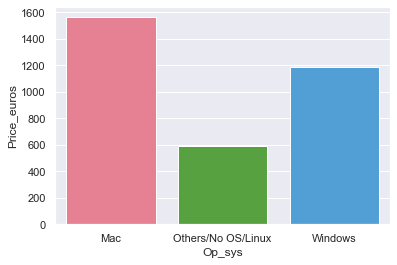

In [316]:
sns.barplot(data=data,x='Op_sys',y='Price_euros',ci=None,palette='husl');

In [317]:
# Mac Price is high followed by Windows 
# [ According to this we can conclude that Price and Mac OS is corelated]
# Other OS are less costly

# 10) Memory Column

In [318]:
data.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
128GB HDD                          1
5

In [319]:
data['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [320]:
# Here the Memory is of four types
# We can fetch only those types and makes it in a new features
# Creating four columns which are HDD, SSD, Hybrid and Flash_storage

In [321]:
Memory1=data['Memory'].str.split('+')
Memory1

0                 [128GB SSD]
1       [128GB Flash Storage]
2                 [256GB SSD]
3                 [512GB SSD]
4                 [256GB SSD]
                ...          
1298              [128GB SSD]
1299              [512GB SSD]
1300     [64GB Flash Storage]
1301                [1TB HDD]
1302              [500GB HDD]
Name: Memory, Length: 1302, dtype: object

In [322]:
# Here we created a New feature by divinding the records which are separated by '+'

In [323]:
data['Memory1']=data['Memory'].str.split('+')
data['Memory1']

0                 [128GB SSD]
1       [128GB Flash Storage]
2                 [256GB SSD]
3                 [512GB SSD]
4                 [256GB SSD]
                ...          
1298              [128GB SSD]
1299              [512GB SSD]
1300     [64GB Flash Storage]
1301                [1TB HDD]
1302              [500GB HDD]
Name: Memory1, Length: 1302, dtype: object

In [324]:
# Here the data which we divided contains both GB and TB
# So we are converting TB into GB

In [325]:
def SSD(text):
    res=0
    for i in text:
        if 'SSD' in i:
            res=i.strip() # This for removing starting and ending parts of the line
            if 'TB' in res:
                res=res[:-6]
                return int((res))*1000
            else:
                res=res[:-6]
                return int(float(res))
    return res
data['SSD']=data['Memory1'].apply(SSD)
data['SSD'].value_counts()

256     500
0       459
128     172
512     138
1000     16
32        6
180       5
16        3
8         1
64        1
240       1
Name: SSD, dtype: int64

In [326]:
data.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_resol,Y_resol,Cpu_Processor,Gpu_brand,Op_sys,Memory1,SSD
1122,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,1513.0,0,0,1920,1080,Intel Core i5,Intel,Windows,[256GB SSD],256
239,Acer,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.50,846.0,0,1,1920,1080,Intel Core i5,Nvidia,Windows,[256GB SSD],256


In [327]:
# Similarly for HDD

In [328]:
def HDD(text):
    l=len(text)
    res=0
    for i in text:
        if 'HDD' in i:
            res=i.strip()
            if 'TB' in res:
                res=res[:-6]
                return int(float(res))*1000
            else:
                res=res[:-6]
                return int(float(res))
    return res
data['HDD']=data['Memory1'].apply(HDD)
data['HDD'].value_counts()

0       726
1000    409
500     134
2000     31
32        1
128       1
Name: HDD, dtype: int64

In [329]:
# For Flash

In [330]:
def Flash(text):
    l=len(text)
    res=0
    for i in text:
        if 'Flash Storage' in i:
            res=i.strip()
            if 'TB' in res:
                res=res[:-16]
                return int(float(res))*1000
            else:
                res=res[:-16]
                return int(float(res))
    return res
data['Flash Storage']=data['Memory1'].apply(Flash)
data['Flash Storage'].value_counts()

0      1228
32       37
64       16
256       8
16        7
128       4
512       2
Name: Flash Storage, dtype: int64

In [331]:
# For Hybrid

In [332]:
def Hybrid(text):
    l=len(text)
    res=0
    for i in text:
        if 'Hybrid' in i:
            res=i.strip()
            if 'TB' in res:
                res=res[:-9]
                return int(float(res))*1000
            else:
                res=res[:-9]
                return int(float(res))
    return res
data['Hybrid']=data['Memory1'].apply(Hybrid)
data['Hybrid'].value_counts()

0       1290
1000      11
508        1
Name: Hybrid, dtype: int64

In [333]:
data[data['Memory'] =='1.0TB Hybrid']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_resol,Y_resol,Cpu_Processor,Gpu_brand,Op_sys,Memory1,SSD,HDD,Flash Storage,Hybrid
151,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.62,899.00,0,0,1920,1080,Intel Core i7,Nvidia,Windows,[1.0TB Hybrid],0,0,0,1000
1010,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.65,949.00,0,0,1920,1080,Intel Core i5,Nvidia,Windows,[1.0TB Hybrid],0,0,0,1000
1135,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.50,1099.00,0,0,1920,1080,Intel Core i7,AMD,Windows,[1.0TB Hybrid],0,0,0,1000
1158,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 10,2.50,788.49,0,0,1920,1080,Intel Core i5,AMD,Windows,[1.0TB Hybrid],0,0,0,1000
1176,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32,825.00,0,0,1920,1080,Intel Core i7,Intel,Windows,[1.0TB Hybrid],0,0,0,1000
1258,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32,895.00,0,0,1920,1080,Intel Core i7,AMD,Windows,[1.0TB Hybrid],0,0,0,1000
1266,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99,0,0,1920,1080,AMD Processor,AMD,Windows,[1.0TB Hybrid],0,0,0,1000
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99,0,0,1920,1080,AMD Processor,AMD,Windows,[1.0TB Hybrid],0,0,0,1000
1294,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,549.99,0,0,1920,1080,AMD Processor,AMD,Windows,[1.0TB Hybrid],0,0,0,1000


In [334]:
# 9 rows are containing the values with .0TB

In [335]:
# Checking the collinearity with Dependent variable 
# If any shows less and we gonna drop it off

In [336]:
data.corr()['Price_euros']

Inches           0.067329
Ram              0.742905
Weight           0.209867
Price_euros      1.000000
Touchscreen      0.192917
IPS              0.253320
X_resol          0.557369
Y_resol          0.554591
SSD              0.676066
HDD             -0.096122
Flash Storage   -0.040067
Hybrid           0.007942
Name: Price_euros, dtype: float64

### There is strong correlation between the variables Ram and price ,SSD and price,PPI and price
### There is weak correlation for the variables HDD,flash storage,Hybrid.

In [337]:
# Dropping them off and Unecessary Features as well

In [338]:
data.drop(['Flash Storage','Hybrid'],axis=1,inplace=True)

In [339]:
data.drop(['Memory1','Memory'],axis=1,inplace=True)

In [340]:
data.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,X_resol,Y_resol,Cpu_Processor,Gpu_brand,Op_sys,SSD,HDD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,Intel,Mac,128,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,Intel,Mac,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,Intel,Others/No OS/Linux,256,0


# 11) Does the price vary with laptop size in Weight?

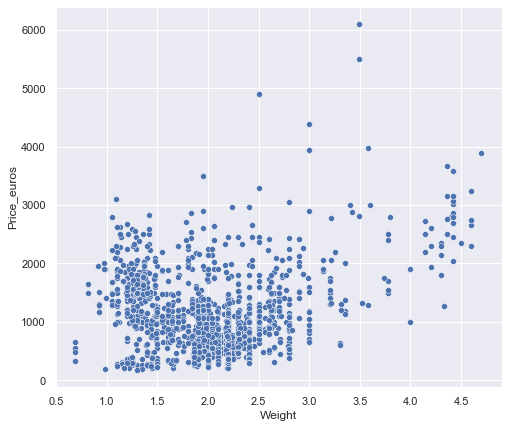

In [341]:
plt.figure(figsize=(8,7))
sns.scatterplot(x=data.Weight,y=data.Price_euros);

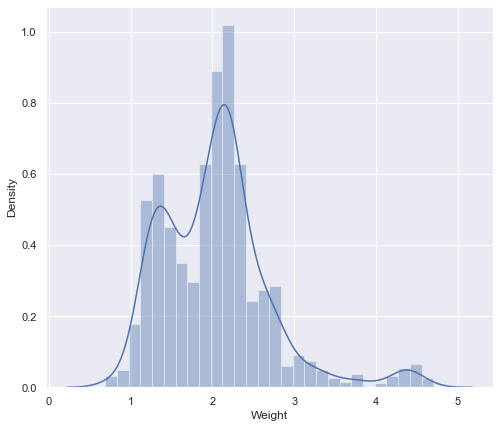

In [342]:
plt.figure(figsize=(8,7))
sns.distplot(data.Weight);

In [343]:
# Observation
# Most of the weights are concentrated between 1,2 and 2,3

# Replacing inches, X and Y resolution to PPI

X and Y-axis resolution have a very strong resolution so we can take advantage of it and convert these three columns to a single column that is known as Pixel per inches(PPI).
In the end, our goal is to improve the performance by having fewer features.

In [344]:
data['PPI']=((data['X_resol']**2) + (data['Y_resol']**2))**0.5/data['Inches']

In [345]:
data['PPI']=data['PPI'].astype('float64')

In [346]:
data['PPI']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: PPI, Length: 1302, dtype: float64

In [347]:
data.drop(['Cpu','Gpu','OpSys'],axis=1,inplace=True)

In [348]:
data.drop(['X_resol','Y_resol'],axis=1,inplace=True)

In [349]:
data.drop(['Inches'],axis=1,inplace=True)

In [350]:
data.head(3)

,Company,TypeName,ScreenResolution,Ram,Weight,Price_euros,Touchscreen,IPS,Cpu_Processor,Gpu_brand,Op_sys,SSD,HDD,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,1.37,1339.69,0,1,Intel Core i5,Intel,Mac,128,0,226.983005
1,Apple,Ultrabook,1440x900,8,1.34,898.94,0,0,Intel Core i5,Intel,Mac,0,0,127.677940
2,HP,Notebook,Full HD 1920x1080,8,1.86,575.00,0,0,Intel Core i5,Intel,Others/No OS/Linux,256,0,141.211998


# Corelation Matrix between Variables

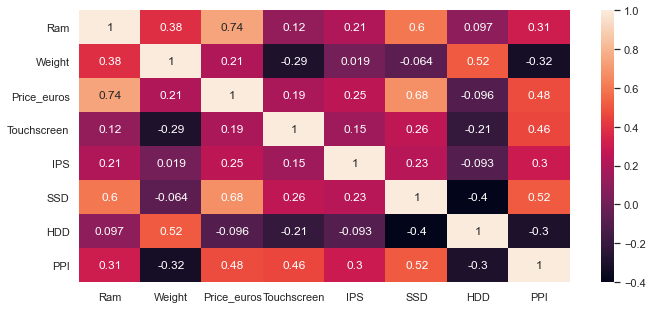

In [351]:
corr=data.corr()
plt.figure(figsize=(11,5))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True);
plt.show()

In [352]:
# Observation
# Ram and SSD has higher collinearity with Price
# HDD and Touchscreen has weak collinearity, So these can be droppped from modelling

# Distribution of Dependent variable

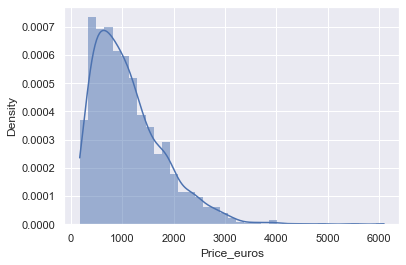

In [353]:
sns.histplot(data.Price_euros,kde=True, stat="density", linewidth=0);

It is Right-Skewed
Log-Normal Transformation
The distribution of the target variable above which was right-skewed. By transforming it to normal distribution performance of the algorithm will increase.This can be done by taking the log of values that transform to the normal distribution So while separating dependent and independent variables we will take a log of price, and in displaying the result perform exponent of it.

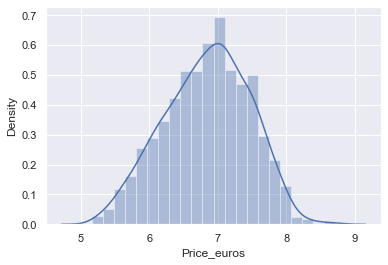

In [354]:
sns.distplot(np.log(data['Price_euros']))
plt.show()

In [355]:
data_modified=data

In [356]:
data_modified.Gpu_brand.value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

In [357]:
data_modified.drop('ScreenResolution',axis=1,inplace=True)

In [358]:
data_modified.head(3)

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,Cpu_Processor,Gpu_brand,Op_sys,SSD,HDD,PPI
0,Apple,Ultrabook,8,1.37,1339.69,0,1,Intel Core i5,Intel,Mac,128,0,226.983005
1,Apple,Ultrabook,8,1.34,898.94,0,0,Intel Core i5,Intel,Mac,0,0,127.677940
2,HP,Notebook,8,1.86,575.00,0,0,Intel Core i5,Intel,Others/No OS/Linux,256,0,141.211998


In [359]:
data_modified.corr().Price_euros

Ram            0.742905
Weight         0.209867
Price_euros    1.000000
Touchscreen    0.192917
IPS            0.253320
SSD            0.676066
HDD           -0.096122
PPI            0.475368
Name: Price_euros, dtype: float64

# Encoding Categorical variable with pandas get_dummies method

In [360]:
obj_cols = list(data_modified.select_dtypes(include='object').columns)
obj_cols

['Company', 'TypeName', 'Cpu_Processor', 'Gpu_brand', 'Op_sys']

In [361]:
#-------Displaying all columns in a DataFrame-----
pd.options.display.max_columns = None

In [362]:
pd.get_dummies(data=data_modified,columns=obj_cols)

,Ram,Weight,Price_euros,Touchscreen,IPS,SSD,HDD,PPI,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu_Processor_AMD Processor,Cpu_Processor_Intel Core i3,Cpu_Processor_Intel Core i5,Cpu_Processor_Intel Core i7,Cpu_Processor_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Op_sys_Mac,Op_sys_Others/No OS/Linux,Op_sys_Windows
0,8,1.37,1339.69,0,1,128,0,226.983005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,8,1.34,898.94,0,0,0,0,127.677940,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
2,8,1.86,575.00,0,0,256,0,141.211998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
3,16,1.83,2537.45,0,1,512,0,220.534624,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
4,8,1.37,1803.60,0,1,256,0,226.983005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,638.00,1,1,128,0,157.350512,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1299,16,1.30,1499.00,1,1,512,0,276.053530,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1300,2,1.50,229.00,0,0,0,0,111.935204,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
1301,6,2.19,764.00,0,0,0,1000,100.454670,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1


In [363]:
new_data = pd.get_dummies(data=data_modified,columns=obj_cols)
new_data.shape

(1302, 44)

In [364]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ram                                  1302 non-null   int32  
 1   Weight                               1302 non-null   float32
 2   Price_euros                          1302 non-null   float64
 3   Touchscreen                          1302 non-null   int64  
 4   IPS                                  1302 non-null   int64  
 5   SSD                                  1302 non-null   int64  
 6   HDD                                  1302 non-null   int64  
 7   PPI                                  1302 non-null   float64
 8   Company_Acer                         1302 non-null   uint8  
 9   Company_Apple                        1302 non-null   uint8  
 10  Company_Asus                         1302 non-null   uint8  
 11  Company_Chuwi                 

In [365]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

# Train_Test_Splitting

In [366]:
X = new_data.drop(columns=['Price_euros'],axis=1)
y = np.log(new_data['Price_euros'])

In [367]:
X

,Ram,Weight,Touchscreen,IPS,SSD,HDD,PPI,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Cpu_Processor_AMD Processor,Cpu_Processor_Intel Core i3,Cpu_Processor_Intel Core i5,Cpu_Processor_Intel Core i7,Cpu_Processor_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Op_sys_Mac,Op_sys_Others/No OS/Linux,Op_sys_Windows
0,8,1.37,0,1,128,0,226.983005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,8,1.34,0,0,0,0,127.677940,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
2,8,1.86,0,0,256,0,141.211998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
3,16,1.83,0,1,512,0,220.534624,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
4,8,1.37,0,1,256,0,226.983005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,128,0,157.350512,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1299,16,1.30,1,1,512,0,276.053530,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1300,2,1.50,0,0,0,0,111.935204,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
1301,6,2.19,0,0,0,1000,100.454670,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1


In [368]:
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price_euros, Length: 1302, dtype: float64

In [369]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Model Building

In [370]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [371]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [372]:
y_pred=model.predict(X_test)
y_pred

array([6.72699996, 5.71577798, 6.07036658, 6.384647  , 6.94369002,
       7.44142409, 6.28254195, 6.42649336, 7.15688201, 5.61291849,
       6.95389052, 7.06060286, 7.75105162, 6.91731139, 8.03144713,
       6.8809086 , 6.82991286, 5.62230264, 7.42886992, 7.53417082,
       7.70988809, 7.10341902, 6.82375975, 7.30780669, 6.53029214,
       7.81314345, 7.0662448 , 6.14186441, 6.9193904 , 6.65543623,
       7.12777205, 6.04691382, 6.6021763 , 7.09163924, 7.12898894,
       6.80882903, 6.94824858, 6.98463698, 7.25224562, 7.46976347,
       7.70405455, 7.2910182 , 5.7811619 , 6.01386519, 6.21479292,
       6.03224527, 7.02703734, 7.9550273 , 7.54221983, 6.87423964,
       7.55579253, 7.51969023, 5.77756082, 5.54057657, 6.76094313,
       6.81841345, 6.08567114, 7.08352919, 6.23710127, 6.49120589,
       7.02261611, 7.12102385, 5.9066722 , 6.5124156 , 6.81761237,
       6.56720229, 6.06416666, 7.44551726, 6.75986357, 5.94852706,
       6.98346587, 6.77261611, 6.64087259, 6.46292182, 6.65357

In [373]:
# Since we have done log normalization of dependent variable the predicted values will also be in Log format
# Inorder to change this we use np.exp()

In [374]:
np.exp(y_pred)

array([  834.63955039,   303.62032327,   432.83932204,   592.67548287,
        1036.5881965 ,  1705.17681606,   535.14725267,   618.00303205,
        1282.9046002 ,   273.94257035,  1047.21602735,  1165.1473757 ,
        2324.01511479,  1009.60191377,  3076.19009935,   973.51048917,
         925.1101933 ,   276.5253898 ,  1683.90355212,  1870.8924152 ,
        2230.29265582,  1216.11790948,   919.43536838,  1491.90139233,
         685.59847597,  2472.89163948,  1171.73964318,   464.91956401,
        1011.70306966,   776.99680219,  1246.09762899,   422.80615839,
         736.69671871,  1201.87634773,  1247.61491377,   905.80950678,
        1041.32433614,  1079.91431542,  1411.27047247,  1754.19172588,
        2217.32002888,  1467.06370856,   324.13558334,   409.06136843,
         500.09242144,   416.64947025,  1126.68766759,  2849.86612713,
        1886.01201656,   967.03978811,  1911.7847857 ,  1843.99599568,
         322.97044618,   254.82488103,   863.45616481,   914.53290939,
      

In [418]:
model.intercept_

6.842966794148784

In [419]:
model.coef_

array([ 1.38903532e-01,  5.41396411e-02, -3.63126070e-02,  1.99957136e-02,
        1.18235324e-01,  4.53451906e-03,  9.56561750e-02, -3.76164429e+09,
        1.45824639e+09, -4.38692040e+09, -7.36374296e+08, -5.82745452e+09,
       -7.36374296e+08, -6.01536643e+08, -5.54171627e+09, -6.01536643e+08,
       -6.01536643e+08, -5.75166070e+09, -2.73362423e+09, -1.03988453e+09,
       -7.36374296e+08, -1.12266092e+09, -1.03988453e+09, -2.67196795e+09,
       -8.49882116e+08, -7.36374296e+08,  2.59204944e+10,  3.36841655e+10,
        1.35571866e+10,  4.57716207e+10,  3.30071271e+10,  1.32657008e+10,
       -2.58341907e+10, -3.80165667e+10, -5.61708477e+10, -5.93606356e+10,
       -3.88607075e+10, -1.13878039e+10, -1.62639840e+10, -1.50888164e+10,
        1.09882217e+10,  3.60055931e+10,  3.80752678e+10])

# Beta and p values


                   Beta             P>|t|
                   
Ram          -  1.38903532e-01      0.000   
Weight       -  5.41396411e-02      0.000 
Touchscreen  - -3.63126070e-02      0.833    0.081
IPS          -  1.99957136e-02      0.171
SSD          -  1.18235324e-01      0.000 
HDD          -  4.53451906e-03      0.116
PPI          -  9.56561750e-02      0.000

# Evaluating the Model

In [375]:
# importing r2_score module

In [376]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [377]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8006405420613845
MAE 0.20425645406617887


In [378]:
# The Mean squared error is the difference bewteen the actual y and predicted y whole square
# We need to reduce this

In [379]:
score = r2_score(y_test,y_pred)
print('R2 score',score)
print('mean_squared_error',mean_squared_error(y_test,y_pred))
print('sqrt(mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8006405420613845
mean_squared_error 0.07089959244585119
sqrt(mean_squared_error 0.2662697738119203


In [380]:
model.coef_

array([ 1.38903532e-01,  5.41396411e-02, -3.63126070e-02,  1.99957136e-02,
        1.18235324e-01,  4.53451906e-03,  9.56561750e-02, -3.76164429e+09,
        1.45824639e+09, -4.38692040e+09, -7.36374296e+08, -5.82745452e+09,
       -7.36374296e+08, -6.01536643e+08, -5.54171627e+09, -6.01536643e+08,
       -6.01536643e+08, -5.75166070e+09, -2.73362423e+09, -1.03988453e+09,
       -7.36374296e+08, -1.12266092e+09, -1.03988453e+09, -2.67196795e+09,
       -8.49882116e+08, -7.36374296e+08,  2.59204944e+10,  3.36841655e+10,
        1.35571866e+10,  4.57716207e+10,  3.30071271e+10,  1.32657008e+10,
       -2.58341907e+10, -3.80165667e+10, -5.61708477e+10, -5.93606356e+10,
       -3.88607075e+10, -1.13878039e+10, -1.62639840e+10, -1.50888164e+10,
        1.09882217e+10,  3.60055931e+10,  3.80752678e+10])

In [381]:
round(model.score(X_train,y_train)*100,2)

83.7

In [382]:
round(model.score(X_test,y_test)*100,2)

80.06

In [383]:
mean_absolute_error(y_test,y_pred)

0.20425645406617887

In [384]:
r2_score(y_test,y_pred)

0.8006405420613845

In [385]:
 def compare_train_test(modell):
    y_train_pred = model.predict(X_train)
    y_test_pred= model.predict(X_test)
    print("Training-model Accuracy:",round(model.score(X_train,y_train)*100,2))
    print("Testing-model Accuracy:",round(model.score(X_test,y_test)*100,2))
    print('Mean Absolute error of testing data:',mean_absolute_error(y_test,y_pred))
    print("R2 score",r2_score(y_test,y_pred))
    
compare_train_test(model)    
    

Training-model Accuracy: 83.7
Testing-model Accuracy: 80.06
Mean Absolute error of testing data: 0.20425645406617887
R2 score 0.8006405420613845


In [386]:
def random_state_comp(l,u):
    for i in range(l,u+1):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=i)
        model=LinearRegression()
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        compare_train_test(model)
        print(i)
random_state_comp(1,100)

Training-model Accuracy: 83.7
Testing-model Accuracy: 80.06
Mean Absolute error of testing data: 0.20425645406617887
R2 score 0.8006405420613845
1
Training-model Accuracy: 83.7
Testing-model Accuracy: 80.06
Mean Absolute error of testing data: 0.20425645406617887
R2 score 0.8006405420613845
2
Training-model Accuracy: 83.7
Testing-model Accuracy: 80.06
Mean Absolute error of testing data: 0.20425645406617887
R2 score 0.8006405420613845
3
Training-model Accuracy: 83.7
Testing-model Accuracy: 80.06
Mean Absolute error of testing data: 0.20425645406617887
R2 score 0.8006405420613845
4
Training-model Accuracy: 83.7
Testing-model Accuracy: 80.06
Mean Absolute error of testing data: 0.20425645406617887
R2 score 0.8006405420613845
5
Training-model Accuracy: 83.7
Testing-model Accuracy: 80.06
Mean Absolute error of testing data: 0.20425645406617887
R2 score 0.8006405420613845
6
Training-model Accuracy: 83.7
Testing-model Accuracy: 80.06
Mean Absolute error of testing data: 0.20425645406617887
R

# Here the Training Accuracy is found out to be 83.47
# Here the Testing Accuracy is found out to be 80.79
# Mean Absolute error of testing data: 0.20
# R2 score 0.8079125245308013

# KEY TERMS FOR SIMPLE LINEAR REGRESSION

# Adjusted r2 value 0.79

In [387]:
import sklearn

In [388]:
r2=0.80

In [389]:
adj_r2 = (1 - (1 - r2) * ((X.shape[0] - 1) / 
          (X.shape[0] - X.shape[1] - 1)))

In [390]:
adj_r2

0.7931637519872814

In [391]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [392]:
data_modified.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price_euros', 'Touchscreen',
       'IPS', 'Cpu_Processor', 'Gpu_brand', 'Op_sys', 'SSD', 'HDD', 'PPI'],
      dtype='object')

# ANOVA (Analysis of variance )

What is p- Value?
The p-value is a probability that measures the evidence against the null hypothesis. Lower probabilities provide stronger evidence against the null hypothesis.
A sufficiently large F-value indicates that the term or model is significant.

In [393]:
mod = ols("Price_euros~Ram+Weight+SSD+PPI+IPS", data=data_modified).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                sum_sq      df           F        PR(>F)
Ram       5.315478e+07     1.0  325.975005  3.565254e-65
Weight    6.649859e+06     1.0   40.780674  2.367907e-10
SSD       2.769140e+07     1.0  169.819242  1.442160e-36
PPI       1.843215e+07     1.0  113.036310  2.270472e-25
IPS       3.451892e+05     1.0    2.116894  1.459238e-01
Residual  2.113309e+08  1296.0         NaN           NaN


# Variance Inflation Factor

In [416]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Price_euros ~ Ram + Weight + SSD + HDD + PPI + IPS + Touchscreen', data=data_modified, return_type='dataframe')


vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,37.257374,Intercept
1,2.451890,Ram
2,1.989897,Weight
3,2.623777,SSD
4,1.793738,HDD
5,1.871245,PPI
6,1.128745,IPS
7,1.315016,Touchscreen


In [395]:
y_actual=y
df_temp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_temp

,Actual,Predicted
248,6.514713,6.727000
555,5.411646,5.715778
1251,5.988961,6.070367
547,6.136322,6.384647
885,7.494986,6.943690
...,...,...
861,7.207119,6.816544
1204,7.063904,6.974845
790,7.199678,7.059394
1046,7.292337,6.928858


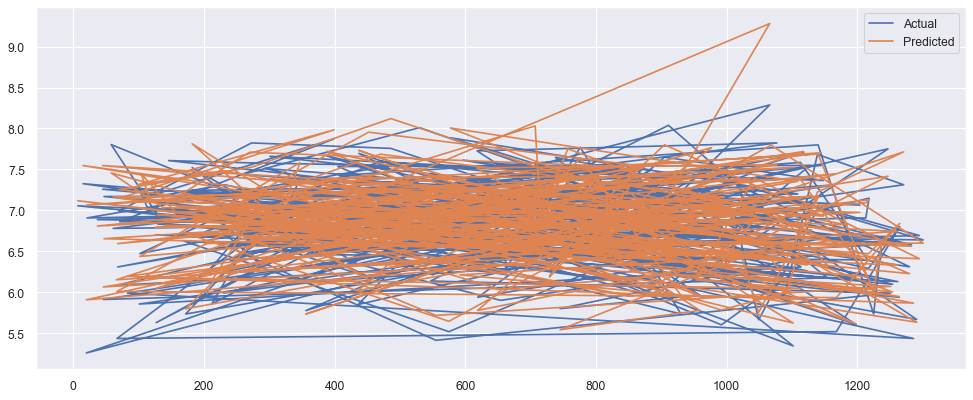

In [396]:
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()

# Response
The variable we are trying to predict.

Synonyms
dependent variable, Y-variable, target, outcome

The dependent variable is Price_euros

# Independent variable
The variable used to predict the response.

Synonyms
X-variable, feature, attribute

The independent variables are ['IPS', 'Cpu_Processor', 'Gpu_brand', 'Op_sys', 'SSD', 'PPI''Company', 'TypeName', 'Ram', 'Weight','Touchscreen']

# Intercept
The intercept of the regression line—that is, the predicted value when X = 0 .

Synonyms
b 0 , β 0

In [397]:
# The below is the Regression line for intercept = 0

In [398]:
import statsmodels.api as sm

In [399]:
X=sm.add_constant(X)
mo=sm.OLS(y,X).fit()

In [400]:
mo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     285.3
Date:                Sat, 07 May 2022   Prob (F-statistic):          4.99e-257
Time:                        19:03:31   Log-Likelihood:                -625.31
No. Observations:                1302   AIC:                             1267.
Df Residuals:                    1294   BIC:                             1308.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.5904      0.066     84.229      0.000       5.460       5.721
Ram             0.0454      0.003     13.554      0.000       0.039       0.052
Weight          0.0748      0.023      3.241      0.001       0.030       0.120
Touchscreen    -0.0223      0.035     -0.633      0.527      -0.091       0.047
IPS             0.0933      0.026      3.624      0.000       0.043       0.144
PPI             0.0032      0.000      9.306      0.000       0.003       0.004
SSD             0.0011   9.53e-05     11.762      0.000       0.001       0.001
HDD          4.056e-05   2.83e-05      1.432      0.152    -1.5e-05    9.61e-05
==============================================================================
Omnibus:                       14.674   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.951
Skew:                          -0.166   Prob(JB):                     0.000126
Kurtosis:                       3.470   Cond. No.                     4.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression coefficient
The slope of the regression line.

Synonyms
slope, b 1 , β 1 , parameter estimates, weights

In [401]:
import statsmodels.formula.api as sm

In [402]:
mod= sm.ols(formula="Price_euros~Company+TypeName+Ram+Weight+Touchscreen+SSD+IPS+PPI+Cpu_Processor+Gpu_brand+Op_sys", data=data_modified).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     123.8
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        19:03:31   Log-Likelihood:                -9392.2
No. Observations:                1302   AIC:                         1.886e+04
Df Residuals:                    1265   BIC:                         1.905e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               -326.1967     74.129     -4.400      0.000    -471.626    -180.768
Company[T.Apple]                         142.8236     67.737      2.109      0.035       9.935     275.712
Company[T.Asus]                           57.8577     44.596      1.297      0.195     -29.632     145.348
Company[T.Chuwi]                        -216.3708    198.563     -1.090      0.276    -605.921     173.179
Company[T.Dell]                          111.0631     41.996      2.645      0.008      28.674     193.452
Company[T.Fujitsu]                       -61.9702    196.883     -0.315      0.753    -448.224     324.283
Company[T.Google]                        390.0400    204.066      1.911      0.056     -10.304     790.384
Company[T.HP]                            187.5598     40.584      4.621      0.000     107.940     267.180
Company[T.Huawei]                         39.3043    240.621      0.163      0.870    -432.757     511.365
Company[T.LG]                            662.1206    201.300      3.289      0.001     267.201    1057.040
Company[T.Lenovo]                        118.2512     39.343      3.006      0.003      41.067     195.435
Company[T.MSI]                           247.9729     66.629      3.722      0.000     117.258     378.688
Company[T.Mediacom]                      -97.0039    134.712     -0.720      0.472    -361.288     167.280
Company[T.Microsoft]                     395.9124    148.683      2.663      0.008     104.220     687.605
Company[T.Razer]                        1087.0399    138.018      7.876      0.000     816.271    1357.808
Company[T.Samsung]                       330.0975    126.010      2.620      0.009      82.886     577.309
Company[T.Toshiba]                       288.9640     61.318      4.713      0.000     168.668     409.260
Company[T.Vero]                          -83.9794    173.269     -0.485      0.628    -423.906     255.947
Company[T.Xiaomi]                        135.6437    174.364      0.778      0.437    -206.430     477.717
TypeName[T.Gaming]                       -51.6351     72.077     -0.716      0.474    -193.039      89.769
TypeName[T.Netbook]                     -105.6382     87.843     -1.203      0.229    -277.971      66.695
TypeName[T.Notebook]                    -228.0968     57.675     -3.955      0.000    -341.246    -114.948
TypeName[T.Ultrabook]                     65.9258     56.605      1.165      0.244     -45.125     176.976
TypeName[T.Workstation]                  711.4042     87.031      8.174      0.000     540.663     882.146
Cpu_Processor[T.Intel Core i3]            20.2371     62.247      0.325      0.745    -101.882     142.356
Cpu_Processor[T.Intel Core i5]           172.9933     57.539      3.007      0.003     


Ram             0.000      
SSD             0.000       
IPS             0.171     
Weight          0.000     
PPI             0.000       
Touchscreen     0.833     
HDD             0.116

# Fitted values
The estimates Y ^ i obtained from the regression line.

Synonyms
predicted values

In [403]:
price_predicted=np.exp(y_pred)
price_predicted

array([  834.63955039,   303.62032327,   432.83932204,   592.67548287,
        1036.5881965 ,  1705.17681606,   535.14725267,   618.00303205,
        1282.9046002 ,   273.94257035,  1047.21602735,  1165.1473757 ,
        2324.01511479,  1009.60191377,  3076.19009935,   973.51048917,
         925.1101933 ,   276.5253898 ,  1683.90355212,  1870.8924152 ,
        2230.29265582,  1216.11790948,   919.43536838,  1491.90139233,
         685.59847597,  2472.89163948,  1171.73964318,   464.91956401,
        1011.70306966,   776.99680219,  1246.09762899,   422.80615839,
         736.69671871,  1201.87634773,  1247.61491377,   905.80950678,
        1041.32433614,  1079.91431542,  1411.27047247,  1754.19172588,
        2217.32002888,  1467.06370856,   324.13558334,   409.06136843,
         500.09242144,   416.64947025,  1126.68766759,  2849.86612713,
        1886.01201656,   967.03978811,  1911.7847857 ,  1843.99599568,
         322.97044618,   254.82488103,   863.45616481,   914.53290939,
      

# Residuals
The difference between the observed values and the fitted values.

Synonyms
errors

In [404]:
score = r2_score(y_test,y_pred)
print('R2 score',score)
print('mean_squared_error',mean_squared_error(y_test,y_pred))
print('sqrt(mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred)))


R2 score 0.8006405420613845
mean_squared_error 0.07089959244585119
sqrt(mean_squared_error 0.2662697738119203


# Least squares
The method of fitting a regression by minimizing the sum of squared residuals.

Synonyms
ordinary least squares

Generally we want the p value to be less than 1% or 5%
If the value is close to zero

This probability value (p-value) represents the likelihood that there are no good predictors of the target variable —
there are no good predictors if the p-value is close to zero,

If you look at the column, P>|t|, you can see the p-values for each predictor.
The p-values for TV and radio are less than 0.000, but the p-value for newspapers is 0.86, which
indicates that newspaper spend has no significant impact on sales. Generally, you want the pvalue to be less than 1% or 5%, which are the two standards in practice.


In [405]:
mode = sm.ols(formula="Price_euros~Company+TypeName+Ram+Weight+Touchscreen+SSD+IPS+PPI+Cpu_Processor+Gpu_brand+Op_sys", data=data).fit()
mode.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     123.8
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        19:03:32   Log-Likelihood:                -9392.2
No. Observations:                1302   AIC:                         1.886e+04
Df Residuals:                    1265   BIC:                         1.905e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               -326.1967     74.129     -4.400      0.000    -471.626    -180.768
Company[T.Apple]                         142.8236     67.737      2.109      0.035       9.935     275.712
Company[T.Asus]                           57.8577     44.596      1.297      0.195     -29.632     145.348
Company[T.Chuwi]                        -216.3708    198.563     -1.090      0.276    -605.921     173.179
Company[T.Dell]                          111.0631     41.996      2.645      0.008      28.674     193.452
Company[T.Fujitsu]                       -61.9702    196.883     -0.315      0.753    -448.224     324.283
Company[T.Google]                        390.0400    204.066      1.911      0.056     -10.304     790.384
Company[T.HP]                            187.5598     40.584      4.621      0.000     107.940     267.180
Company[T.Huawei]                         39.3043    240.621      0.163      0.870    -432.757     511.365
Company[T.LG]                            662.1206    201.300      3.289      0.001     267.201    1057.040
Company[T.Lenovo]                        118.2512     39.343      3.006      0.003      41.067     195.435
Company[T.MSI]                           247.9729     66.629      3.722      0.000     117.258     378.688
Company[T.Mediacom]                      -97.0039    134.712     -0.720      0.472    -361.288     167.280
Company[T.Microsoft]                     395.9124    148.683      2.663      0.008     104.220     687.605
Company[T.Razer]                        1087.0399    138.018      7.876      0.000     816.271    1357.808
Company[T.Samsung]                       330.0975    126.010      2.620      0.009      82.886     577.309
Company[T.Toshiba]                       288.9640     61.318      4.713      0.000     168.668     409.260
Company[T.Vero]                          -83.9794    173.269     -0.485      0.628    -423.906     255.947
Company[T.Xiaomi]                        135.6437    174.364      0.778      0.437    -206.430     477.717
TypeName[T.Gaming]                       -51.6351     72.077     -0.716      0.474    -193.039      89.769
TypeName[T.Netbook]                     -105.6382     87.843     -1.203      0.229    -277.971      66.695
TypeName[T.Notebook]                    -228.0968     57.675     -3.955      0.000    -341.246    -114.948
TypeName[T.Ultrabook]                     65.9258     56.605      1.165      0.244     -45.125     176.976
TypeName[T.Workstation]                  711.4042     87.031      8.174      0.000     540.663     882.146
Cpu_Processor[T.Intel Core i3]            20.2371     62.247      0.325      0.745    -101.882     142.356
Cpu_Processor[T.Intel Core i5]           172.9933     57.539      3.007      0.003     

In [420]:
modell= sm.ols(formula="Price_euros~Ram+SSD+IPS+Weight+PPI+Touchscreen+HDD", data=data_modified).fit()
print(modell.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     372.5
Date:                Sat, 07 May 2022   Prob (F-statistic):          9.08e-305
Time:                        19:36:28   Log-Likelihood:                -9656.4
No. Observations:                1302   AIC:                         1.933e+04
Df Residuals:                    1294   BIC:                         1.937e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -421.1120     68.296     -6.166      

In [407]:
# Touchscreen 0.833 This has no significant effect on dependent variable